In [1]:
from image_manager import ImageManager
from sinogram_generator import SinogramGenerator
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
import imageio
import numpy as np
warnings.filterwarnings('ignore')
import pydicom
from pydicom.data import get_testdata_files
import datetime
import cv2
from skimage import data, io
import matplotlib.pyplot as plt

In [2]:
def getHistorySinogram(x, tab):
    imageManager.showImage(tab[x], False, 'xd')


In [3]:
nl = widgets.IntText(
    value=300,
    description='n:',
    disabled=False
)
ll = widgets.IntText(
    value=180,
    description='l:',
    disabled=False
)
alfal = widgets.FloatText(
    value=1,
    description='alfa:',
    disabled=False
)
display(nl)
display(ll)
display(alfal)

IntText(value=300, description='n:')

IntText(value=180, description='l:')

FloatText(value=1.0, description='alfa:')

In [7]:
#wczytanie jpg
img = ImageManager.readImage('Shepp_logan.jpg')


TypeError: readImage() missing 1 required positional argument: 'path'

In [5]:
#wczytanie docoma
ds = pydicom.dcmread('cd.dcm')
img = np.array(ds.pixel_array)


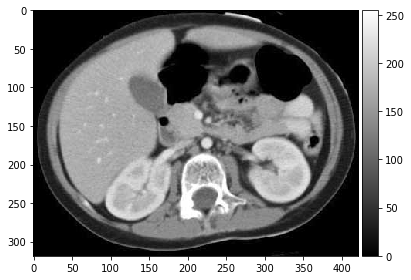

300
180
1.0
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0


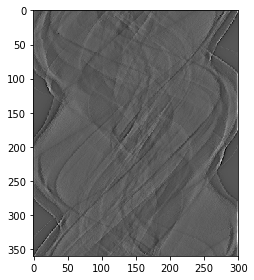

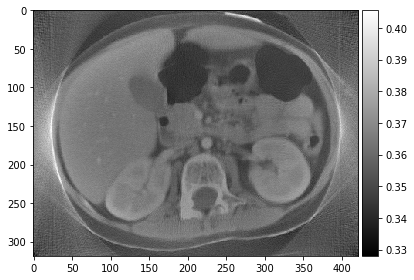

In [18]:
imageManager.showImage(img, True, 'reverted_z_fitrem')
n = nl.value
l = ll.value
alfa = alfal.value
print(n)
print(l)
print(alfa)
imageManager = ImageManager()

sinogramGenrator = SinogramGenerator(img, n, l, alfa)
# sinogram = sinogramGenrator.generate(img)
# imageManager.showImage(sinogram, True, 'sinogram_bez_filtra')
# imageManager.showImage(sinogramGenrator.revert(), True, 'reverted_bez_filtra')
sinogramGenrator.withFilter = True
sinogram = sinogramGenrator.generate(img)
imageManager.showImage(sinogram, True, 'sinogram_z_filtrem')
pierwotny = sinogramGenrator.revert()
imageManager.showImage(pierwotny, True, 'reverted_z_fitrem')

In [9]:
tab = sinogramGenrator.sinogram_histor
print(len(tab))
interact(getHistorySinogram,x = widgets.IntSlider(min=0,max=20,step=1,value=0), tab = fixed(tab))

21


interactive(children=(IntSlider(value=0, description='x', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.getHistorySinogram(x, tab)>

In [16]:
tab2 = sinogramGenrator.revert_history
for t in range(0,len(tab2)):
    for i in range(tab2[0].shape[0]):
        for j in range(tab2[0].shape[1]):
            tab2[t][i, j] = tab2[t][i, j] / sinogramGenrator.amount[i, j]


In [20]:
print(len(tab2))

44


In [19]:
tab2 = sinogramGenrator.revert_history
# imageManager.showImage(tab2[10], False, 'xd')
interact(getHistorySinogram,x = widgets.IntSlider(min=0,max=20,step=1,value=0), tab = fixed(tab2))

interactive(children=(IntSlider(value=0, description='x', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.getHistorySinogram(x, tab)>

In [21]:
namel = "rege"
idl = "dfgd"
sexl = "dfgdf"
commentl = "dfgdg"
# pierwotny = (pierwotny * 255)
# pierwotny = pierwotny /np.max(pierwotny)
pierwotny = pierwotny * 255
print(pierwotny[100,100])
print(pierwotny.mean())


93.24844085051679
91.8354482978667


In [22]:
# pierwotny = np.floor(pierwotny * 255)
ds = pydicom.dcmread('cd.dcm')

ds.PatientName = namel
ds.PatientID = idl
dt = datetime.datetime.now()
ds.ContentDate = dt.strftime('%Y%m%d')
timeStr = dt.strftime('%H%M%S.%f')  # long format with micro seconds
ds.ContentTime = timeStr
ds.AdditionalPatientHistory = commentl
ds.PatientSex = sexl
#     ds.PatientBirthDate = bdate

pixel_array = pierwotny
ds.Columns = pixel_array.shape[1]
ds.Rows = pixel_array.shape[0]

if pixel_array.dtype != np.uint16:
    pixel_array = pixel_array.astype(np.uint16)
ds.PixelData = pixel_array.tobytes()

ds.save_as('wynik.dcm')
print("saved")

saved
